In [3]:
import json
import pandas as pd
import numpy as np

In [5]:
with open('/media/premium/common-biscuit/main/planogram_biscuit/data/iou_json/packets_json/iou_file.json') as f:
	    iou_image = json.load(f)

In [6]:
iou_image

{'PHOTO-2021-07-20-20-32-07 3': {'best_iou': [0.876270592212677,
   0.6732445359230042,
   0.8202764987945557,
   0.7174180746078491,
   0.712774932384491,
   0.7370353937149048,
   0.8966248631477356,
   0.9170607924461365,
   0.8124156594276428,
   0.7682592868804932,
   0.893672525882721,
   0.793694794178009,
   0.6153656840324402,
   0.8493045568466187,
   0.6816486120223999,
   0.44485294818878174,
   0.3281853199005127,
   0.9012550115585327,
   0.031019775196909904,
   0.014584413729608059,
   0.0,
   0.7375571727752686,
   0.6865267157554626,
   0.7839105725288391,
   0.7301218509674072,
   0.3748350441455841,
   0.5538939833641052,
   0.3055964410305023,
   0.40985506772994995,
   0.761550784111023,
   0.757027804851532,
   0.5933226346969604,
   0.2578902542591095,
   0.7058227062225342,
   0.31076017022132874,
   0.42031070590019226,
   0.2310134619474411,
   0.027302589267492294,
   0.18344400823116302,
   0.20476652681827545,
   0.2437579333782196,
   0.19287854433059692,

In [7]:
image_name = []
detection_scores = []
for key, value in iou_image.items():
    image_name.append(key)
    detection_scores.append(value['detection_score'])

In [8]:
df = pd.DataFrame({'image_name': image_name, 'detection_scores': detection_scores})
df.sort_values(by=['detection_scores'], inplace=True)
df.reset_index(drop=True,inplace=True)
df

,image_name,detection_scores
0,PHOTO-2021-07-26-09-43-37,0.000000
1,PHOTO-2021-07-24-15-30-52,0.434783
2,PHOTO-2021-07-26-14-05-57,0.666667
3,PHOTO-2021-07-26-13-13-54,0.707692
4,PHOTO-2021-07-21-08-13-01,0.719101
...,...,...
152,PHOTO-2021-07-21-08-38-26,0.990909
153,PHOTO-2021-07-21-08-05-38,1.004608
154,PHOTO-2021-07-27-12-18-17,1.008929
155,PHOTO-2021-07-26-15-35-14,1.011765


In [9]:
df.to_csv('/media/premium/common-biscuit/main/planogram_biscuit/data/raw/csvs/packets_score.csv')

In [22]:
iou_scores_all = []
for key, value in iou_image.items():
    iou_scores_all.extend(value['best_iou'])

In [30]:
df_ious = pd.DataFrame({'packets_ious': iou_scores_all})
df_ious.sort_values(by=['packets_ious'], inplace=True)
df_ious.reset_index(drop=True,inplace=True)
df_ious

,packets_ious
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
12076,0.990000
12077,0.990291
12078,0.990385
12079,0.990826


## Distribution Plot

/home/darshita-rathore/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


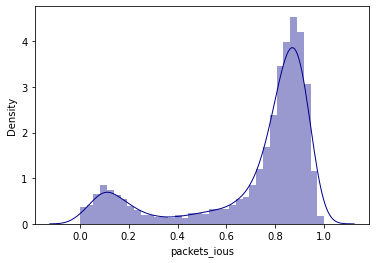

In [31]:
import seaborn as sns
sns_plot = sns.distplot(df_ious['packets_ious'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue',
             kde_kws={'linewidth': 1})
sns_plot.figure.savefig("/media/premium/common-biscuit/main/planogram_biscuit/data/packets_ious_distribution.png")